# Hierarchical Clustering

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from __future__ import division
import numpy as np
# from keras.models import Sequential
# from keras.layers.core import Dense
# from keras.optimizers import SGD
import pandas as pd
from sklearn.model_selection import train_test_split
# import theano
import cv2
from sklearn import preprocessing
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/peternygaard/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Perform hierarchical clustering on observations (columns)

In [46]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette
import scipy.spatial.distance as ssd
from faker import Factory

fake = Factory.create()
colorList = []

for i in range(5000):
    colorList.append(fake.hex_color())

set_link_color_palette(colorList)

df = pd.read_csv('know_your_y.csv')
# df = df[df['Yr'] >= 2011]
# df = df[df['AST%'] <= 15]
# df = df[df['Pos'] >= 2]
# df = df[df['Pos'] <= 4]
df.reset_index(inplace=True, drop=True)

df['Player_ID'] = df['Player_ID'].astype(int)

y = np.array(df['OBPM 3-4-5'].values)
pid = np.array(df['Player_ID'].values)
yr = np.array(df['Yr'].values)
images = []
for i in range(len(pid)):
    images.append(cv2.imread('thumbnails/thumbnail_{0}_{1}-{2}.png'.format(str(pid[i]), str(yr[i]-1), str(yr[i])[-2:]), 0))
X = np.array(images)
flat_exes = []
for i in range(len(X)):
    flat_exes.append(X[i].flatten())
X = np.array(flat_exes)

/Users/peternygaard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


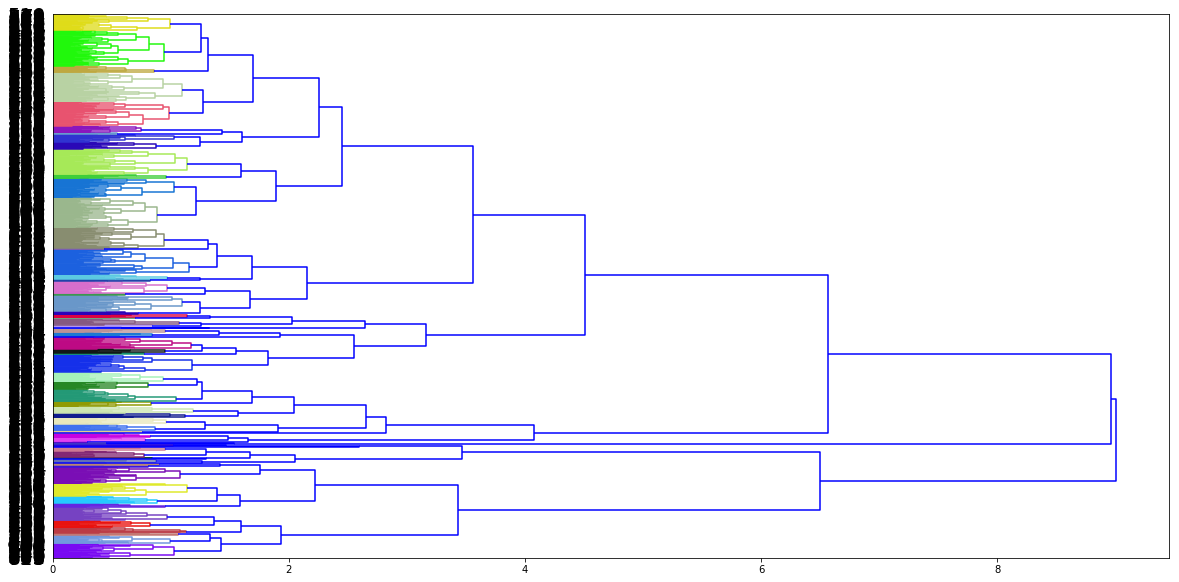

In [47]:
# Create distance matrix on columns using cosine distance
# convert the redundant n*n square matrix form into a condensed nC2 array
dist = ssd.squareform(pdist(X, 'cosine'))
clust = linkage(dist, method='complete')

fig, ax = plt.subplots(figsize=(20,10))
_ = dendrogram(clust, color_threshold=1.2, orientation='right', ax=ax)
_ = plt.xticks(fontsize=10)
_ = plt.yticks(fontsize=20)

In [48]:
R = dendrogram(clust,
                color_threshold=1.2, no_plot=True)

In [49]:
from collections import defaultdict
from matplotlib.colors import rgb2hex, colorConverter

class Clusters(dict):
    def _repr_html_(self):
        html = '<table style="border: 0;">'
        for c in self:
            hx = rgb2hex(colorConverter.to_rgb(c))
            html += '<tr style="border: 0;">' \
            '<td style="background-color: {0}; ' \
                       'border: 0;">' \
            '<code style="background-color: {0};">'.format(hx)
            html += c + '</code></td>'
            html += '<td style="border: 0"><code>' 
            html += repr(self[c]) + '</code>'
            html += '</td></tr>'

        html += '</table>'

        return html

def get_cluster_classes(den, label='ivl'):
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))

    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den[label][i] for i in l]
        cluster_classes[c] = i_l

    return cluster_classes

lineups = get_cluster_classes(R)

In [50]:
lineups

#790af3,"['756', '819', '689', '872', '268', '460', '334', '446', '533', '651', '982', '359', '689', '516', '904', '845', '206', '673', '374', '122', '412', '424', '900', '139', '435', '50', '955', '139']"
#7197de,"['66', '500', '293', '355', '832', '257', '416', '140', '552', '890', '23', '385', '26', '81', '120']"
#c37874,"['322', '346', '885', '60']"
#bb3b45,"['292', '777', '222', '609', '196', '368', '378', '407', '108', '349']"
#e9120f,"['459', '925', '339', '472', '893', '820', '94', '192', '358', '582', '717', '813', '541']"
#7642c2,"['622', '896', '199', '613', '522', '588', '986', '304', '688', '345', '465', '24', '715', '291', '946', '691', '725', '150', '458', '381', '307', '569', '525', '799']"
#6525e1,"['51', '476', '19', '544', '72', '76', '592']"
#25c9fe,"['778', '824', '428', '44', '218', '405', '928', '45', '227', '870', '34', '693', '682']"
#dfe92b,"['624', '779', '971', '351', '430', '33', '290', '659', '279', '821', '947', '107', '463', '373', '675', '312', '80', '540', '10', '102', '905', '764', '656']"
#7a0eb5,"['437', '827', '418', '610', '158', '871', '214', '243', '660', '984', '585', '780', '803', '855', '299', '647', '15', '176', '92', '973', '399', '468', '690', '728', '177', '509', '4', '286', '178', '217']"
#3e15da,"['296', '977', '800']"


In [51]:
thing = []

for ok in range(len(list(lineups.values()))):
    comps = list(lineups.values())[ok]

    for i in comps:
#         thing.append([df['Player'][int(i)], df['Age'][int(i)], ok, df['OBPM'][int(i)], df['OBPM 3-4-5'][int(i)], df['AST%'][int(i)], df['AST% 3-4-5'][int(i)]])
         thing.append([df['Player'][int(i)], df['Pos'][int(i)], df['Yr'][int(i)], df['Age'][int(i)], ok, df['OBPM'][int(i)], df['OBPM 3-4-5'][int(i)], df['AST%'][int(i)], df['AST% 3-4-5'][int(i)], df['FTr'][int(i)], df['STL%'][int(i)], df['ORB%'][int(i)], df['BLK%'][int(i)], df['USG%'][int(i)], df['FT%'][int(i)], df['TOV%'][int(i)], df['Yr'][int(i)], df['3PAr'][int(i)], df['eFG%'][int(i)], df['TS%'][int(i)]])
    loadout = pd.DataFrame(thing)
#     loadout.rename(columns={0:'Player', 1: 'Age', 2: 'Cluster', 3: 'OBPM', 4:'OBPM 3-4-5', 5: 'AST%', 6:'AST% 3-4-5'},inplace=True)
    loadout.rename(columns={0:'Player', 1: 'Pos', 2: 'Year', 3: 'Age', 4: 'Cluster', 5: 'OBPM', 6:'OBPM 3-4-5', 7: 'AST%', 8:'AST% 3-4-5', 9:'FTr', 10:'STL%', 11:'ORB%', 12:'BLK%', 13:'USG%', 14:'FT%', 15:'TOV%', 16:'Yr', 17:'3PAr', 18:'eFG%', 19:'TS%'},inplace=True)
    loadout = loadout.sort_values('OBPM 3-4-5', ascending=False)
    loadout.reset_index(inplace=True, drop=True)
    print(loadout)
    print('------------')

dx = pd.DataFrame(thing)
# dx.rename(columns={0:'Player', 1: 'Age', 2: 'Cluster', 3: 'OBPM', 4:'OBPM 3-4-5', 5: 'AST%', 6:'AST% 3-4-5'},inplace=True)
dx.rename(columns={0:'Player', 1: 'Pos', 2: 'Year', 3: 'Age', 4: 'Cluster', 5: 'OBPM', 6:'OBPM 3-4-5', 7: 'AST%', 8:'AST% 3-4-5', 9:'FTr', 10:'STL%', 11:'ORB%', 12:'BLK%', 13:'USG%', 14:'FT%', 15:'TOV%', 16:'Yr', 17:'3PAr', 18:'eFG%', 19:'TS%'},inplace=True)

                 Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0         Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
1        Antawn Jamison    3  1999   22        0  -1.1         2.2   5.9   
2   Shareef Abdur-Rahim    4  1997   20        0  -0.8         1.6  12.1   
3         Zach Randolph    4  2003   21        0   0.6         0.0   5.7   
4           Jeff Foster    5  2001   24        0  -2.5        -0.3   4.6   
5           Mikki Moore    5  2001   25        0  -2.7        -1.1   4.6   
6      Rasho Nesterovic    5  2000   23        0  -2.3        -1.2   7.8   
7        Timofey Mozgov    5  2011   24        0  -4.0        -1.4   4.2   
8             Ike Diogu    4  2006   22        0  -2.0        -1.4   4.9   
9            JJ Hickson    5  2009   20        0  -4.7        -1.7   2.1   
10        Jason Maxiell    5  2007   23        0  -3.0        -1.7   2.5   
11       Stromile Swift    4  2001   21        0  -3.4        -2.0   3.5   
12          

                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0          Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
1             Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
2          Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
3         Antawn Jamison    3  1999   22        0  -1.1         2.2   5.9   
4            Brad Miller    5  2000   23        9   0.0         2.2   7.8   
5         Antoine Walker    4  1997   20        2  -0.7         2.1  15.3   
6      Amar'e Stoudemire    4  2003   20        8  -1.6         2.1   5.0   
7              Pau Gasol    5  2002   21        5   0.7         1.8  13.8   
8    Shareef Abdur-Rahim    4  1997   20        0  -0.8         1.6  12.1   
9         Brandan Wright    4  2009   21        4  -0.2         1.3   4.9   
10          Paul Millsap    4  2007   21        9   0.3         1.0   6.7   
11           Brook Lopez    5  2009   20        3  -1.2         0.9   6.2   

                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0            Elton Brand    4  2000   20       10   1.3         3.3  11.8   
1          Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
2             Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
3            Steve Novak    4  2009   25       13   1.6         2.7   5.8   
4          Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
5         Antawn Jamison    3  1999   22        0  -1.1         2.2   5.9   
6            Brad Miller    5  2000   23        9   0.0         2.2   7.8   
7      Amar'e Stoudemire    4  2003   20        8  -1.6         2.1   5.0   
8         Antoine Walker    4  1997   20        2  -0.7         2.1  15.3   
9              Pau Gasol    5  2002   21        5   0.7         1.8  13.8   
10   Shareef Abdur-Rahim    4  1997   20        0  -0.8         1.6  12.1   
11        Brandan Wright    4  2009   21        4  -0.2         1.3   4.9   

[248 rows x 20 columns]
------------
                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0            Elton Brand    4  2000   20       10   1.3         3.3  11.8   
1          Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
2             Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
3          Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
4            Steve Novak    4  2009   25       13   1.6         2.7   5.8   
5       Danilo Gallinari    3  2010   21       23   1.3         2.5   7.6   
6            Brad Miller    5  2000   23        9   0.0         2.2   7.8   
7         Antawn Jamison    3  1999   22        0  -1.1         2.2   5.9   
8      Amar'e Stoudemire    4  2003   20        8  -1.6         2.1   5.0   
9         Jamal Crawford    1  2001   20       23  -3.9         2.1  23.0   
10        Antoine Walker    4  1997   20        2  -0.7         2.1  15.3   
11             Pau Gasol    5  2002   2

                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0         Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
1        Peja Stojakovic    3  1999   21       26   0.2         3.4  10.8   
2            Elton Brand    4  2000   20       10   1.3         3.3  11.8   
3          Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
4             Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
5            Steve Novak    4  2009   25       13   1.6         2.7   5.8   
6          Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
7          Klay Thompson    2  2012   21       28   0.9         2.5  14.2   
8       Danilo Gallinari    3  2010   21       23   1.3         2.5   7.6   
9            Brad Miller    5  2000   23        9   0.0         2.2   7.8   
10        Antawn Jamison    3  1999   22        0  -1.1         2.2   5.9   
11        Antoine Walker    4  1997   20        2  -0.7         2.1  15.3   

                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0         Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
1            Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
2             Kevin Love    5  2009   20       31  -0.7         3.9   6.8   
3        Peja Stojakovic    3  1999   21       26   0.2         3.4  10.8   
4            Elton Brand    4  2000   20       10   1.3         3.3  11.8   
5          Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
6             Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
7           Andre Miller    1  2000   23       31   1.8         2.8  38.7   
8          Carlos Boozer    4  2003   21        0   0.3         2.7   9.3   
9            Steve Novak    4  2009   25       13   1.6         2.7   5.8   
10      Danilo Gallinari    3  2010   21       23   1.3         2.5   7.6   
11         Klay Thompson    2  2012   21       28   0.9         2.5  14.2   

                 Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0        Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
1           Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
2          Derrick Rose    1  2009   20       43   0.9         5.1  28.8   
3     Russell Westbrook    1  2009   20       43   0.1         4.3  27.5   
4         Tracy McGrady    3  1998   18       43  -0.5         3.9  14.0   
5            Kevin Love    5  2009   20       31  -0.7         3.9   6.8   
6       Peja Stojakovic    3  1999   21       26   0.2         3.4  10.8   
7           Elton Brand    4  2000   20       10   1.3         3.3  11.8   
8         Blake Griffin    4  2011   21        1   2.2         3.0  18.7   
9      Andrei Kirilenko    3  2002   20       42   0.8         2.8   7.4   
10         Andre Miller    1  2000   23       31   1.8         2.8  38.7   
11           Tim Duncan    4  1998   21        5   1.8         2.8  13.7   
12        Ca

                      Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0                 Chris Paul    1  2006   20       47   4.7         8.0  38.2   
1               LeBron James    2  2004   19       48   2.2         7.4  27.8   
2               Vince Carter    3  1999   22       45   2.1         5.9  17.2   
3             Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
4                Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
5               Derrick Rose    1  2009   20       43   0.9         5.1  28.8   
6               Jimmy Butler    3  2013   23       48   0.9         4.6   8.6   
7          Russell Westbrook    1  2009   20       43   0.1         4.3  27.5   
8              Tracy McGrady    3  1998   18       43  -0.5         3.9  14.0   
9                 Kevin Love    5  2009   20       31  -0.7         3.9   6.8   
10             Kawhi Leonard    3  2012   20       48   2.0         3.6   6.6   
11           Peja Stojakovic

                    Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0               Chris Paul    1  2006   20       47   4.7         8.0  38.2   
1             LeBron James    2  2004   19       48   2.2         7.4  27.8   
2             Vince Carter    3  1999   22       45   2.1         5.9  17.2   
3           Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
4                Ray Allen    2  1997   21       51   1.6         5.4  13.9   
5          Stephon Marbury    1  1997   19       52   2.0         5.4  38.1   
6              Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
7             Derrick Rose    1  2009   20       43   0.9         5.1  28.8   
8            Manu Ginobili    2  2003   25       51   1.1         4.9  15.8   
9             Jimmy Butler    3  2013   23       48   0.9         4.6   8.6   
10             Baron Davis    1  2000   20       52  -1.1         4.5  32.6   
11            Kevin Durant    2  2008   19       52 

                      Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0                 Chris Paul    1  2006   20       47   4.7         8.0  38.2   
1               LeBron James    2  2004   19       48   2.2         7.4  27.8   
2               Vince Carter    3  1999   22       45   2.1         5.9  17.2   
3             Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
4            Stephon Marbury    1  1997   19       52   2.0         5.4  38.1   
5                  Ray Allen    2  1997   21       51   1.6         5.4  13.9   
6                Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
7               Derrick Rose    1  2009   20       43   0.9         5.1  28.8   
8              Isaiah Thomas    1  2012   22       58   3.2         4.9  25.6   
9              Manu Ginobili    2  2003   25       51   1.1         4.9  15.8   
10             Ryan Anderson    4  2009   20       55  -0.1         4.7   6.4   
11              Jimmy Butler

                  Player  Pos  Year  Age  Cluster  OBPM  OBPM 3-4-5  AST%  \
0             Chris Paul    1  2006   20       47   4.7         8.0  38.2   
1           LeBron James    2  2004   19       48   2.2         7.4  27.8   
2          Stephen Curry    1  2010   21       60   1.8         6.6  24.6   
3           Vince Carter    3  1999   22       45   2.1         5.9  17.2   
4           James Harden    2  2010   20       60   0.7         5.7  12.3   
5         Damian Lillard    1  2013   22       27   2.7         5.7  28.8   
6        Stephon Marbury    1  1997   19       52   2.0         5.4  38.1   
7              Ray Allen    2  1997   21       51   1.6         5.4  13.9   
8         Gilbert Arenas    1  2002   20       62   2.3         5.2  24.8   
9            Dwyane Wade    1  2004   22       31   0.9         5.2  25.1   
10          Derrick Rose    1  2009   20       43   0.9         5.1  28.8   
11         Isaiah Thomas    1  2012   22       58   3.2         4.9  25.6   

In [52]:
keys = np.array(list(lineups.keys()))
uniqlo = np.where(keys == 'b')[0][0]
naCl = max(dx['Cluster']) - np.array(dx[dx['Cluster'] == uniqlo].index)[0]

for i in np.array(dx[dx['Cluster'] == uniqlo].index)[1:]:
    dx['Cluster'][i] = naCl + i

/Users/peternygaard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
dx = dx[~dx.duplicated()]
dx.reset_index(inplace=True, drop=True)

In [151]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

wheres = []
whats = []

dgenx = dx[dx['OBPM 3-4-5'] >= -9]
# dgenx = dgenx[dgenx['AST%'] < 10]
# dgenx = dgenx[dgenx['Pos'] < 4]
# dgenx = dgenx[dgenx['Yr'] >= 2011]
dgenx.reset_index(inplace=True, drop=True)

X = np.array(dgenx[['Age', 'Cluster']].values)
y = np.array(dgenx['AST% 3-4-5'].values)
# X = np.array(dgenx[['Cluster']].values)
# y = np.array(dgenx['FTr'].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

model = XGBRegressor(base_score=0.532819182, learning_rate=.01, n_estimators=2000)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(score)
#     for j in range(100):
#         regr = RandomForestRegressor(random_state=j, n_estimators=1000)
#         regr.fit(X_train, y_train)
#         predictions = regr.predict(X_test)
#         if regr.score(X_test, y_test) > 0:
#             wheres.append([i, j])
#             whats.append(regr.score(X_test, y_test))
#             print(i, j, regr.score(X_test, y_test))
        
# use if statements to only expand on ones where first result clears a certain threshold

0.3173066475721291


In [152]:
# X_tract = []

# for g in range(len(X_test)):
#     comsense = dgenx[dgenx['Age'] == X_test[g][0]]
#     comsense = comsense[comsense['Cluster'] == X_test[g][1]]
# #     comsense = comsense[comsense['USG%'] == X_test[g][2]]
# #     comsense = comsense[comsense['FTr'] == X_test[g][3]]
#     X_tract.append(comsense.index[0])

# testers = dgenx.iloc[X_tract]
# testers['Proj. Y'] = model.predict(X_test)
# testers.sort_values('Proj. Y', ascending=False)

In [153]:
future = dx[dx['OBPM 3-4-5'].isna()]
# future = future[future['AST%'] < 20]
# future = future[future['Pos'] < 4]
future.reset_index(inplace=True, drop=True)

X_future = np.array(future[['Age', 'Cluster']].values)

future['Proj. Y'] = model.predict(X_future)
future.sort_values('Proj. Y', ascending=False)

/Users/peternygaard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Player,Pos,Year,Age,Cluster,OBPM,OBPM 3-4-5,AST%,AST% 3-4-5,FTr,...,ORB%,BLK%,USG%,FT%,TOV%,Yr,3PAr,eFG%,TS%,Proj. Y
72,Nikola Jokic,5,2016,20,35,2.6,NaN,18.1,NaN,0.317,...,11.4,2.3,19.9,0.811,13.2,2016,0.140,0.535,0.582,31.923969
41,Devonte' Graham,1,2019,23,24,-1.6,NaN,24.8,NaN,0.213,...,1.6,0.3,17.0,0.761,11.3,2019,0.560,0.421,0.459,30.702452
40,Jevon Carter,1,2019,23,24,-3.8,NaN,17.4,NaN,0.173,...,2.7,1.8,18.0,0.813,14.2,2019,0.551,0.395,0.432,30.702452
145,Delon Wright,1,2018,25,56,1.2,NaN,19.6,NaN,0.271,...,3.6,1.8,17.2,0.829,13.9,2018,0.354,0.530,0.574,28.255840
146,Donovan Mitchell,2,2018,21,57,1.3,NaN,19.4,NaN,0.218,...,2.3,0.9,29.1,0.805,12.6,2018,0.404,0.506,0.541,28.074862
151,Kyle Kuzma,4,2018,22,58,-0.3,NaN,9.1,NaN,0.200,...,3.9,1.1,22.5,0.707,11.0,2018,0.418,0.527,0.549,27.449898
150,Dario Saric,4,2017,22,58,-2.0,NaN,14.3,NaN,0.237,...,5.8,1.1,24.6,0.782,15.2,2017,0.368,0.468,0.508,27.449898
135,Derrick White,1,2019,24,56,-0.2,NaN,21.0,NaN,0.227,...,2.2,2.3,17.7,0.772,14.0,2019,0.262,0.523,0.555,27.325794
51,Jonah Bolden,4,2019,23,27,-0.8,NaN,8.5,NaN,0.167,...,8.0,4.8,13.8,0.481,17.2,2019,0.593,0.599,0.595,26.774652
70,Wendell Carter Jr.,5,2019,19,35,-2.4,NaN,10.7,NaN,0.302,...,8.4,4.5,19.1,0.795,13.4,2019,0.086,0.493,0.541,26.281946


In [347]:
# df_cluster

In [284]:
# df_nocluster